In [248]:
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from collections import Counter
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import cv2
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

In [250]:
IMG_SIZE = 299
BATCH_SIZE = 32
EPOCHS = 15
LEARNING_RATE = 0.001

In [252]:
train_dir = r'C:\Users\srida\Downloads\Images_CNN\train'
test_dir = r'C:\Users\srida\Downloads\Images_CNN\test'

In [254]:
def get_class_counts(directory):
    """Counts the number of images in each class folder."""
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

In [256]:
class_counts = get_class_counts(train_dir)
sorted_classes = sorted(class_counts, key=class_counts.get, reverse=True)

In [258]:
top_100_classes = sorted_classes[:101]
next_25_classes = sorted_classes[101:]

In [260]:
split_1 = top_100_classes[:25]
split_2 = top_100_classes[25:50]
split_3 = top_100_classes[50:75]
split_4 = top_100_classes[75:100]
split_5 = next_25_classes

In [262]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [264]:
def create_generators(train_dir, test_dir, classes, batch_size=32, target_size=(299, 299)):
    """
    Creates train and test data generators for a specific set of classes.
    """
    train_gen = train_datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        classes=classes,
        class_mode='categorical'
    )
    test_gen = test_datagen.flow_from_directory(
        test_dir,
        target_size=target_size,
        batch_size=batch_size,
        classes=classes,
        class_mode='categorical'
    )
    return train_gen, test_gen

In [266]:
def create_inception_model(num_classes):
    """
    Creates an InceptionV3 model with the specified number of output classes.
    """
    base_model = tf.keras.applications.InceptionV3(
        weights='imagenet',
        include_top=False,
        input_shape=(IMG_SIZE, IMG_SIZE, 3)
    )
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze Base Model Layers
    for layer in base_model.layers:
        layer.trainable = False

    # Compile the Model
    model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [268]:
# Step 4: Training Function
def train_split_model(train_gen, test_gen, split_name):
    num_classes = train_gen.num_classes
    print(f"Training InceptionV3 for {split_name} with {num_classes} classes.")
    model = create_inception_model(num_classes)

    history = model.fit(
        train_gen,
        epochs=EPOCHS,
        validation_data=test_gen,
        steps_per_epoch=train_gen.samples // train_gen.batch_size,
        validation_steps=test_gen.samples // test_gen.batch_size)

    model.save(f'inceptionv3_model_{split_name}.h5')
    print(f"Model for {split_name} saved!\n")
    return history

In [270]:
# Step 5: Train Models for All Splits
train_gen_1, test_gen_1 = create_generators(train_dir, test_dir, split_1, BATCH_SIZE, (IMG_SIZE, IMG_SIZE))
train_gen_2, test_gen_2 = create_generators(train_dir, test_dir, split_2, BATCH_SIZE, (IMG_SIZE, IMG_SIZE))
train_gen_3, test_gen_3 = create_generators(train_dir, test_dir, split_3, BATCH_SIZE, (IMG_SIZE, IMG_SIZE))
train_gen_4, test_gen_4 = create_generators(train_dir, test_dir, split_4, BATCH_SIZE, (IMG_SIZE, IMG_SIZE))
train_gen_5, test_gen_5 = create_generators(train_dir, test_dir, split_5, BATCH_SIZE, (IMG_SIZE, IMG_SIZE))

Found 20000 images belonging to 25 classes.
Found 5000 images belonging to 25 classes.
Found 20000 images belonging to 25 classes.
Found 5000 images belonging to 25 classes.
Found 20000 images belonging to 25 classes.
Found 5000 images belonging to 25 classes.
Found 20000 images belonging to 25 classes.
Found 5000 images belonging to 25 classes.
Found 2478 images belonging to 37 classes.
Found 637 images belonging to 37 classes.


In [52]:
# Train and Save Models for Each Split
history_1 = train_split_model(train_gen_1, test_gen_1, 'split_1')

Training InceptionV3 for split_1 with 25 classes.
Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 829s 1s/step - accuracy: 0.4728 - loss: 1.8500 - val_accuracy: 0.6422 - val_loss: 1.1768
Epoch 2/15


C:\Users\srida\Anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.4368
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 810s 1s/step - accuracy: 0.6390 - loss: 1.2031 - val_accuracy: 0.6609 - val_loss: 1.1190
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.6127
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 813s 1s/step - accuracy: 0.6592 - loss: 1.1228 - val_accuracy: 0.6701 - val_loss: 1.0791
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.8849
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 810s 1s/step - accuracy: 0.6787 - loss: 1.0458 - val_accuracy: 0.6847 - val_loss: 1.0453
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.8219
Epoch 9/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 801s 1s/step - accuracy: 0.6892 

Model for split_1 saved!



In [57]:
history_2 = train_split_model(train_gen_2, test_gen_2, 'split_2')

Training InceptionV3 for split_2 with 25 classes.
Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 1015s 2s/step - accuracy: 0.5257 - loss: 1.7224 - val_accuracy: 0.6967 - val_loss: 0.9969
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.4171
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 792s 1s/step - accuracy: 0.6969 - loss: 0.9929 - val_accuracy: 0.7402 - val_loss: 0.8762
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 1.0059
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 784s 1s/step - accuracy: 0.7216 - loss: 0.8974 - val_accuracy: 0.7616 - val_loss: 0.8180
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.4299
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 761s 1s/step - accuracy: 0.7415 - loss: 0.8361 - val_accuracy: 0.7648 - val_loss: 0.8103
Epoch 8/15
625/625 

Model for split_2 saved!



In [274]:
history_3 = train_split_model(train_gen_3, test_gen_3, 'split_3')

Training InceptionV3 for split_3 with 25 classes.
Epoch 1/15


C:\Users\srida\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 931s 1s/step - accuracy: 0.5541 - loss: 1.5544 - val_accuracy: 0.7200 - val_loss: 0.9419
Epoch 2/15


C:\Users\srida\Anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 1.0814
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 752s 1s/step - accuracy: 0.7256 - loss: 0.9187 - val_accuracy: 0.7648 - val_loss: 0.7765
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.4546
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 739s 1s/step - accuracy: 0.7533 - loss: 0.8185 - val_accuracy: 0.7472 - val_loss: 0.8308
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.7484
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 740s 1s/step - accuracy: 0.7636 - loss: 0.7719 - val_accuracy: 0.7752 - val_loss: 0.7380
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.6171
Epoch 9/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 741s 1s/step - accuracy: 0.7815 

Model for split_3 saved!



In [275]:
history_4 = train_split_model(train_gen_4, test_gen_4, 'split_4')

Training InceptionV3 for split_4 with 25 classes.
Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 956s 2s/step - accuracy: 0.4975 - loss: 1.7231 - val_accuracy: 0.6581 - val_loss: 1.0759
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 1.2359
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 747s 1s/step - accuracy: 0.6682 - loss: 1.0602 - val_accuracy: 0.6791 - val_loss: 0.9801
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.6486
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 737s 1s/step - accuracy: 0.6877 - loss: 0.9830 - val_accuracy: 0.7089 - val_loss: 0.9086
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.3723
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 740s 1s/step - accuracy: 0.7111 - loss: 0.9254 - val_accuracy: 0.6975 - val_loss: 0.9674
Epoch 8/15
625/625 ━

Model for split_4 saved!



In [272]:
history_5 = train_split_model(train_gen_5, test_gen_5, 'split_5')

Training InceptionV3 for split_5 with 37 classes.
Epoch 1/15


C:\Users\srida\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/77 ━━━━━━━━━━━━━━━━━━━━ 1:58 2s/step - accuracy: 0.2026 - loss: 3.4150

C:\Users\srida\Anaconda\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


77/77 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.3999 - loss: 2.3922 - val_accuracy: 0.7270 - val_loss: 0.8495
Epoch 2/15
 1/77 ━━━━━━━━━━━━━━━━━━━━ 1:00 800ms/step - accuracy: 0.7500 - loss: 1.0430

C:\Users\srida\Anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7500 - loss: 1.0430 - val_accuracy: 0.7586 - val_loss: 0.8581
Epoch 3/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.7529 - loss: 0.7732 - val_accuracy: 0.7155 - val_loss: 0.9157
Epoch 4/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7500 - loss: 1.0602 - val_accuracy: 0.7241 - val_loss: 0.6587
Epoch 5/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.7788 - loss: 0.6552 - val_accuracy: 0.7697 - val_loss: 0.7465
Epoch 6/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8750 - loss: 0.4056 - val_accuracy: 0.8276 - val_loss: 0.7436
Epoch 7/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.8200 - loss: 0.5309 - val_accuracy: 0.7467 - val_loss: 0.7859
Epoch 8/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8438 - loss: 0.4203 - val_accuracy: 0.6897 - val_loss: 0.7984
Epoch 9/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.8430 - loss: 0.4276 - val_accuracy: 0.7796 - val_loss: 0.

Model for split_5 saved!



In [282]:
print("Class labels for Split 1:")
print(split_1)

print("\nClass labels for Split 2:")
print(split_2)

print("\nClass labels for Split 3:")
print(split_3)

print("\nClass labels for Split 4:")
print(split_4)

print("\nClass labels for Split 5:")
print(split_5)

Class labels for Split 1:
['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder']

Class labels for Split 2:
['club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich']

Class labels for Split 3:
['grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobs

In [294]:
def preprocess_image(image_path, target_size=(299, 299)):
    """
    Preprocess the image to feed into the InceptionV3 model.
    """
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)  # Normalize for InceptionV3
    return img_array

In [296]:
# Predict and Annotate Image
def annotate_image(model, image_path, class_names, output_path=None):
    """
    Predict the class of the input image, draw a green bounding box, and overlay the predicted class name.
    """
    # Preprocess the image
    img_array = preprocess_image(image_path)
    
    # Predict the class
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions)

    # Read the original image
    original_img = cv2.imread(image_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
    
    # Draw a green bounding box (here, a box around the entire image)
    height, width, _ = original_img.shape
    cv2.rectangle(original_img, (10, 10), (width - 10, height - 10), color=(0, 255, 0), thickness=5)

    # Put the predicted class label on the image
    label = f"{predicted_class} ({confidence:.2f})"
    font_scale = 1.5
    thickness = 2
    cv2.putText(
        original_img,
        label,
        (20, 50),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=font_scale,
        color=(0, 255, 0),
        thickness=thickness,
    )

    # Display or Save the Annotated Image
    plt.figure(figsize=(8, 8))
    plt.imshow(original_img)
    plt.axis('off')
    plt.show()

    if output_path:
        cv2.imwrite(output_path, cv2.cvtColor(original_img, cv2.COLOR_RGB2BGR))
        print(f"Annotated image saved to {output_path}")

In [298]:
# Combined Model Prediction
def combined_model_prediction(image_path, models, splits, output_path=None):
    """
    Predict using multiple models and select the best prediction based on confidence.
    """
    img_array = preprocess_image(image_path)
    best_prediction = None
    best_confidence = -1
    best_class = None
    best_split = None

    for model, split in zip(models, splits):
        predictions = model.predict(img_array)
        confidence = np.max(predictions)
        if confidence > best_confidence:
            best_confidence = confidence
            best_class = split[np.argmax(predictions)]
            best_split = split

    # Annotate and display the image
    print(f"Best prediction: {best_class} (confidence: {best_confidence:.2f}) from {best_split}")
    annotate_image(models[splits.index(best_split)], image_path, best_split, output_path)

In [285]:
model_1 = load_model('inceptionv3_model_split_1.h5')
model_2 = load_model('inceptionv3_model_split_2.h5')
model_3 = load_model('inceptionv3_model_split_3.h5')
model_4 = load_model('inceptionv3_model_split_4.h5')
model_5 = load_model('inceptionv3_model_split_5.h5')

In [300]:
# Paths
image_path = r"C:\Users\srida\Downloads\Images_CNN\train\bibimbap\882196.jpg"
output_path = r'C:\path_to_save_annotated_image\annotated_image.jpg'

In [302]:
split_1 = ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 
    'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 
    'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 
    'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 
    'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder']
split_2 = ['club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 
    'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 
    'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 
    'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 
    'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich']
split_3=['grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 
         'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 
         'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_soup', 'mussels', 
         'nachos', 'omelette', 'onion_rings', 'oysters', 'pad_thai', 'paella', 'pancakes', 'panna_cotta', 'peking_duck']

Split_4=['pho', 'pizza', 'pork_chop', 'poutine', 'prime_rib', 'pulled_pork_sandwich', 'ramen', 
         'ravioli', 'red_velvet_cake', 'risotto', 'samosa', 'sashimi', 'scallops', 'seaweed_salad', 
         'shrimp_and_grits', 'spaghetti_bolognese', 'spaghetti_carbonara', 'spring_rolls', 'steak', 
         'strawberry_shortcake', 'sushi', 'tacos', 'takoyaki', 'tiramisu', 'tuna_tartare']

split_5=['grapes', 'peas', 'pineapple', 'turnip', 'lettuce', 'soy beans', 'spinach', 'cucumber', 'onion', 
         'cabbage', 'garlic', 'tomato', 'bell pepper', 'sweetcorn', 'capsicum', 'pear', 'beetroot', 'jalepeno', 
         'kiwi', 'chilli pepper', 'corn', 'mango', 'eggplant', 'watermelon', 'paprika', 'carrot', 'lemon', 'raddish', 
         'cauliflower', 'pomegranate', 'potato', 'banana', 'orange', 'sweetpotato', 'apple', 'ginger', '.git']

Single Model Prediction:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


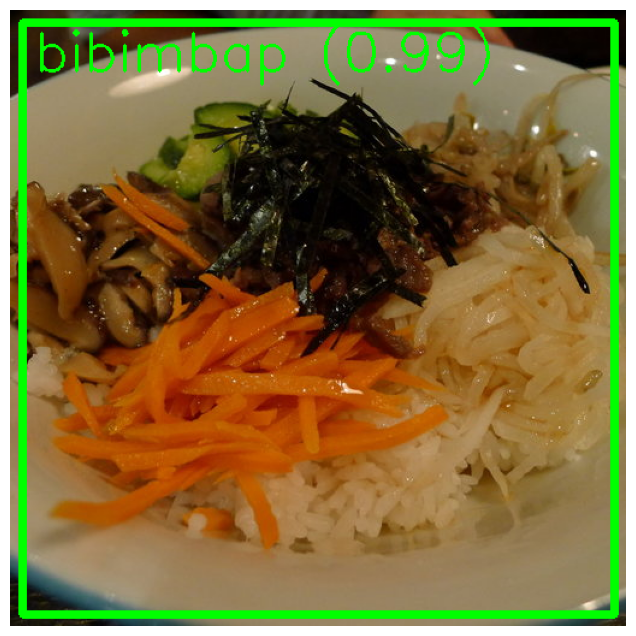

Annotated image saved to C:\path_to_save_annotated_image\annotated_image.jpg


In [304]:
print("Single Model Prediction:")
annotate_image(model_1, image_path, split_1, output_path)

Combined Model Prediction:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Best prediction: bibimbap (confidence: 0.99) from ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


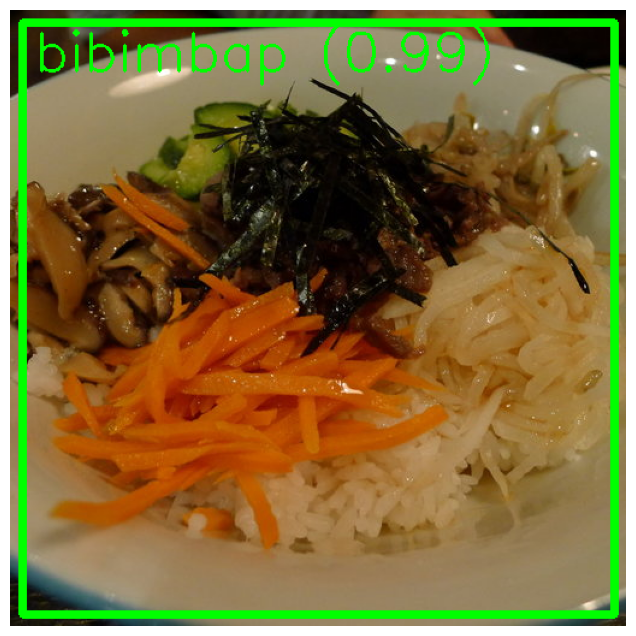

Annotated image saved to C:\path_to_save_annotated_image\annotated_image.jpg


In [306]:
# Combined Model Prediction
print("Combined Model Prediction:")
combined_model_prediction(image_path, [model_1, model_2,model_3, model_4,model_5], [split_1, split_2, split_3, split_4, split_5], output_path)

#### Model Evaluation

In [308]:
def evaluate_model(models, test_dataset, splits, calories_data):
    pred_labels = []
    true_labels = []

    # Iterate through the test dataset
    for images, labels in test_dataset:
        batch_size = images.shape[0]
        model_preds = []

        # Get predictions from each model
        for model, split in zip(models, splits):
            predictions = model.predict(images)
            # Get predicted classes (index of max probability)
            top_predictions = np.argmax(predictions, axis=1)

            # Convert the top predictions into the corresponding food item name
            pred_class = [split[pred] for pred in top_predictions]  # Map index to class label
            model_preds.append(pred_class)

        # For now, let's assume you're using the first model's predictions (or you could average them)
        pred_labels.extend(model_preds[0])  # Use first model's predictions for now
        true_labels.extend([split[label] for label in labels.numpy()])

    # Convert labels to lowercase as calories data is in lowercase
    pred_labels = [label.lower() for label in pred_labels]
    true_labels = [label.lower() for label in true_labels]

    # Calculate evaluation metrics
    accuracy = accuracy_score(true_labels, pred_labels)
    precision = precision_score(true_labels, pred_labels, average='weighted', zero_division=0)
    recall = recall_score(true_labels, pred_labels, average='weighted', zero_division=0)
    f1 = f1_score(true_labels, pred_labels, average='weighted', zero_division=0)

    # Calculate RMSE and MAE (if you have continuous calorie predictions)
    pred_calories = []
    for label in pred_labels:
        # Get the calories associated with each predicted item from the calories data
        calories_row = calories_data[calories_data['itemName'] == label]
        if not calories_row.empty:
            pred_calories.append(calories_row['calories'].values[0])
        else:
            pred_calories.append(0)  # Default to 0 if no match is found
    
    true_calories = []
    for label in true_labels:
        calories_row = calories_data[calories_data['itemName'] == label]
        if not calories_row.empty:
            true_calories.append(calories_row['calories'].values[0])
        else:
            true_calories.append(0)

    rmse = np.sqrt(mean_squared_error(true_calories, pred_calories))
    mae = np.mean(np.abs(np.array(true_calories) - np.array(pred_calories)))

    return accuracy, precision, recall, f1, rmse, mae

# Example usage:
accuracy, precision, recall, f1, rmse, mae = evaluate_model(
    models=[model_1, model_2], 
    test_dataset=test_combined_dataset,  # Your test dataset
    splits=[split_1, split_2],  # Class splits for the models
    calories_data=calories_data)  # Your calorie data dataframe)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 819ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 835ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 821ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 835ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 823ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 822ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 841ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 819

In [310]:
# Print all metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

Accuracy: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
RMSE: 306.08
MAE: 238.37


### Calorie Estimation

#### 1.Calories File Loading

In [312]:
calories_data = pd.read_csv("Calories_Dataset.csv")

print(calories_data.head())

    id  itemName weight  calories carbs protein   fat sodium cholesterol
0  252    banana   118g     105.0   27g    1.3g  0.4g  1.2mg         0mg
1  253     apple   182g      95.0   25g    0.5g  0.3g  1.8mg         0mg
2  254      kiwi    69g      42.0   10g    0.8g  0.4g  2.1mg         0mg
3  255     pizza   107g     285.0   36g     12g   10g  640mg        18mg
4  302  beetroot    50g      22.0    5g    0.8g  0.1g   39mg         0mg


In [314]:
# Preprocess Image
def preprocess_image(image_path, target_size=(299, 299)):
    """
    Preprocess the image to feed into the InceptionV3 model.
    """
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)  # Normalize for InceptionV3
    return img_array

In [316]:
# Function to predict calories based on the predicted item name
def estimate_calories(predicted_class, calories_data):
    """
    Given a predicted class name, estimate the calories by matching it with the dataset.
    Assumes item names in calories_data are in lowercase.
    """
    predicted_class_lower = predicted_class.lower()
    matched_item = calories_data[calories_data['itemName'] == predicted_class_lower]
    
    if not matched_item.empty:
        return matched_item['calories'].values[0]
    else:
        return None

In [318]:
# Function to annotate the image with predicted class and calories
def annotate_image(model, image_path, class_names, calories_data, output_path=None):
    """
    Predict the class of the input image, draw a bounding box, overlay the predicted class name and calories.
    """
    img_array = preprocess_image(image_path)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions)

    # Estimate calories
    estimated_calories = estimate_calories(predicted_class, calories_data)
    
    # Read the original image
    original_img = cv2.imread(image_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    
    # Draw a green bounding box
    height, width, _ = original_img.shape
    cv2.rectangle(original_img, (10, 10), (width - 10, height - 10), color=(0, 255, 0), thickness=5)

    # Put the predicted class and calories label on the image
    label = f"{predicted_class} ({confidence:.2f}) - Calories: {estimated_calories}"
    font_scale = 1.5
    thickness = 2
    cv2.putText(
        original_img,
        label,
        (20, 50),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=font_scale,
        color=(0, 255, 0),
        thickness=thickness,
    )

    # Display or save the annotated image
    plt.figure(figsize=(8, 8))
    plt.imshow(original_img)
    plt.axis('off')
    plt.show()

    if output_path:
        cv2.imwrite(output_path, cv2.cvtColor(original_img, cv2.COLOR_RGB2BGR))
        print(f"Annotated image saved to {output_path}")

In [320]:
# Combined model prediction function
def combined_model_prediction(image_path, models, splits, calories_data, output_path=None):
    """
    Predict using multiple models and select the best prediction based on confidence.
    """
    img_array = preprocess_image(image_path)
    best_prediction = None
    best_confidence = -1
    best_class = None
    best_split = None

    for model, split in zip(models, splits):
        predictions = model.predict(img_array)
        confidence = np.max(predictions)
        if confidence > best_confidence:
            best_confidence = confidence
            best_class = split[np.argmax(predictions)]
            best_split = split

    # Estimate calories for the best prediction
    estimated_calories = estimate_calories(best_class, calories_data)
    
    # Annotate and display the image
    print(f"Best prediction: {best_class} (confidence: {best_confidence:.2f})")
    print(f"Estimated Calories: {estimated_calories}")
    annotate_image(models[splits.index(best_split)], image_path, best_split, calories_data, output_path)

In [461]:
image_path = r"C:\Users\srida\Downloads\Images_CNN\train\tomato\Image_67.jpg"
output_path = r'C:\path_to_save_annotated_image\annotated_image.jpg'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Best prediction: tomato (confidence: 0.96)
Estimated Calories: 22.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


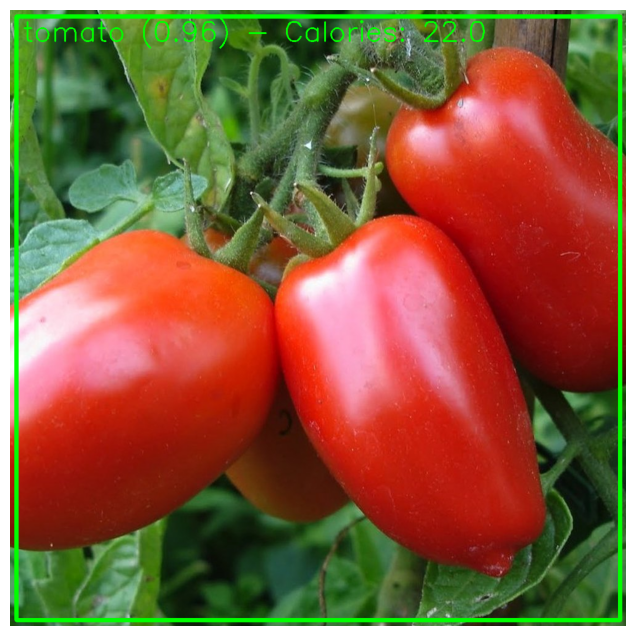

Annotated image saved to C:\path_to_save_annotated_image\annotated_image.jpg


In [463]:
# Combined Model Prediction and Calories Estimation
combined_model_prediction(image_path, [model_1,model_2,model_3,model_4,model_5], [split_1, split_2,split_3,split_4,split_5], calories_data, output_path)

In [467]:
import pickle

# Assuming combined_model is your final combined model
combined_model = [model_1, model_2, model_3, model_4, model_5]  # Adjust as per your final model

# Save the combined model
with open('final_combined_model.pkl', 'wb') as file:
    pickle.dump(combined_model, file)

print("Final combined model saved as 'final_combined_model.pkl'")

Final combined model saved as 'final_combined_model.pkl'


In [473]:
from tensorflow.keras.models import save_model

# Assuming model_1, model_2, ..., model_5 are your individual models
models = [model_1, model_2, model_3, model_4, model_5]

for i, model in enumerate(models, start=1):
    save_model(model, f'model_{i}.h5')
    print(f"Model {i} saved as 'model_{i}.h5'")

Model 1 saved as 'model_1.h5'


Model 2 saved as 'model_2.h5'


Model 3 saved as 'model_3.h5'


Model 4 saved as 'model_4.h5'
Model 5 saved as 'model_5.h5'


In [475]:
import pickle

# Save the list of models as a pickle file
with open('final_combined_model.pkl', 'wb') as file:
    pickle.dump([model_1, model_2, model_3, model_4, model_5], file)

print("All models saved in 'final_combined_model.pkl'")

All models saved in 'final_combined_model.pkl'


In [477]:
for i, model in enumerate(models, start=1):
    model.save(f'model_{i}.keras')
    print(f"Model {i} saved as 'model_{i}.keras'")

Model 1 saved as 'model_1.keras'
Model 2 saved as 'model_2.keras'
Model 3 saved as 'model_3.keras'
Model 4 saved as 'model_4.keras'
Model 5 saved as 'model_5.keras'


In [479]:
from tensorflow.keras.models import load_model

# Load a specific model
model_1 = load_model('model_1.h5')

In [481]:
# Load all models from a pickle file
with open('final_combined_model.pkl', 'rb') as file:
    models = pickle.load(file)

# Access individual models
model_1 = models[0]

C:\Users\srida\Anaconda\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [488]:
import pickle

# Save the list of models as a pickle file
with open('final_combined_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

print("Final combined model saved as 'final_combined_model.pkl'")

Final combined model saved as 'final_combined_model.pkl'


In [490]:
from tensorflow.keras.models import load_model

# Load each saved model
model_1 = load_model('model_1.h5')
model_2 = load_model('model_2.h5')
model_3 = load_model('model_3.h5')
model_4 = load_model('model_4.h5')
model_5 = load_model('model_5.h5')

# Combine into a list or any structure you prefer
final_model = [model_1, model_2, model_3, model_4, model_5]

print("All models loaded successfully!")

All models loaded successfully!


In [494]:
import pickle

# Load all models from the pickle file
with open('final_combined_model.pkl', 'rb') as file:
    final_model = pickle.load(file)

# Access individual models from the list
model_1 = final_model[0]
model_2 = final_model[1]
model_3 = final_model[2]
model_4 = final_model[3]
model_5 = final_model[4]

print("Combined model loaded successfully!")

C:\Users\srida\Anaconda\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Combined model loaded successfully!


In [500]:
image_path = r"C:\Users\srida\Downloads\Images_CNN\train\tomato\Image_67.jpg" 

In [504]:
img = image.load_img(image_path, target_size=(299, 299))  # Resize to (299, 299) for models like InceptionV3
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize if required (common for CNNs)

for i, model in enumerate(final_model, start=1):
    predictions = model.predict(img_array)  # Make prediction for each model
    print(f"Predictions from model_{i}: {predictions}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
Predictions from model_1: [[1.5468844e-05 2.0945823e-05 1.0175781e-05 2.5929827e-03 1.0953730e-03
  2.4798114e-02 3.5730220e-05 5.9824698e-03 3.3349355e-05 3.9366653e-04
  2.8669415e-02 4.0988755e-04 1.5607536e-06 9.2979288e-01 7.0160255e-04
  3.0900640e-03 2.3737090e-04 6.0244136e-05 2.9291975e-04 7.1611721e-05
  8.4972686e-05 5.7079335e-04 8.4779342e-04 1.0519758e-04 8.5382177e-05]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
Predictions from model_2: [[7.9955789e-04 4.8858789e-03 7.2608396e-05 2.3537610e-05 6.9117948e-04
  2.9182446e-04 5.6755817e-03 1.6527176e-02 2.4019860e-01 2.2444713e-04
  2.1134796e-02 4.2052949e-03 2.4589699e-02 2.5606329e-05 5.0114069e-02
  3.9864346e-04 1.3509509e-04 1.6688908e-04 4.0817485e-04 5.1459083e-03
  3.4260792e-03 2.7830381e-04 7.4733458e-02 5.4464489e-01 1.2026617e-03]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
Predictions from model_3: [[1.3905854e-02 3.6389120e-02 1.9756781e-03 7.3958762e-02 2.2915524e-04
  2.81206